
<img src="https://i.ibb.co/1T5Wbn6/Banner-para-Linkedin-capa-de-perfil-para-programador.png"  alt="KCode Banner"  />

<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>


# Estatistica Bivariada
## Variavel qualitativa x variavel qualitativa

## Objetivo:

* Plotar e analisar um gráfico do tipo `Colunas empilhadas` analisando duas variaveis qualitativas correlatas.

### Metodologia/Passos

* Conectar a API do Kaggle e baixar um conjunto de dados aleatórios;
* Filtrar o conjunto de maneira a ficar uma distribuição bivariada;
* Filtrar os dados e exportar no formato `.csv`;
* Criar uma tabéla de contingência;
* Plotar um gráfico de `colunas empilhadas`;
* Analisar os gráficos.

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
import statistics as stats
import math
import scipy.stats
import numpy as np


In [4]:
# Utilizando a API para baixar uma amostra policotomica de dados quantitativos, referente a salários de datascience. 
!kaggle datasets download -d psicodata/dados-de-suicidios-entre-2010-e-2019


  0%|          | 0.00/2.47M [00:00<?, ?B/s]
 41%|████      | 1.00M/2.47M [00:00<00:00, 6.66MB/s]
 81%|████████  | 2.00M/2.47M [00:00<00:00, 7.04MB/s]
100%|██████████| 2.47M/2.47M [00:00<00:00, 6.91MB/s]


In [5]:
# Descompactando o arquivo baixado
z = ZipFile('dados-de-suicidios-entre-2010-e-2019.zip', 'r')
z.extractall()
z.close()

In [13]:
# Criando um data frame
df = pd.read_csv('dados\suicidios_2010_a_2019.csv', encoding='utf8', dtype={'ESCMAE': 'str'})
df.head()

,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESCMAE,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,CIRURGIA
0,AC,2010,1,1/31/2010,11/9/1999,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,Não
1,AC,2010,2,2/7/2010,9/23/1985,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
2,AC,2010,2,2/19/2010,8/6/1995,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
3,AC,2010,4,4/20/2010,12/25/1983,Feminino,Parda,NaN,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,Não
4,AC,2010,7,7/24/2010,5/13/1982,Masculino,Parda,NaN,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio,Não


## Entendendo o conjunto de dados
* estado: Estado de registro;
* ano: Ano de registro;
* mes: Mês de registro;
* DTOBITO: Data do óbito em formato YYYY-MM-DD;
* DTNASC: Data de nascimento em formato YYYY-MM-DD;
* SEXO: Sexo registrado;
* RACACOR: Raça/cor de acordo com a classificação do IBGE;
* ASSISTMED: Recebeu assistência médica? (Sim ou não);
* ESCMAE: Escolaridade registrada da mãe.
* ESTCIV: Estado civil
* ESC: Escolaridade (em anos)
* OCUP: Ocupação
* CODMUNRES: Cidade
* CAUSABAS: Causa básica da morte (de acordo com CID)
* CAUSABAS_O: Causa básica da morte (de acordo com CID)
* LOCOCOR: Local de ocorrência da morte
* CIRURGIA: Foi realizada cirurgia? (Sim ou não)


Fonte: Datasus
autor do conjunto de dados:  
Dalton Breno Costa
https://reisrgabriel.com dalton.bc96@gmail.com


## Limpeza e modelagem dos dados

In [60]:
linhas = df.shape[0]
colunas = df.shape[1]
top = (33*"=")
tit = ("Tamanho do DataFrame")

print(top)
print(f"{tit:^33}")
print(top)
print(f"Linhas:                  {linhas}")
print(f"Colunas:                 {colunas}")
print(f"Total de entradas:       {linhas*colunas/1000000:.2f} mi.")
print(top)

      Tamanho do DataFrame       
Linhas:                  112491
Colunas:                 17
Total de entradas:       1.91 mi.


### Como podemos observar acima trata-se de um dataframe grande, com quase 2 milhões de dados, hoje a mesa está cheia! =)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112491 entries, 0 to 112490
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   estado      112491 non-null  object
 1   ano         112491 non-null  int64 
 2   mes         112491 non-null  int64 
 3   DTOBITO     112491 non-null  object
 4   DTNASC      101633 non-null  object
 5   SEXO        112469 non-null  object
 6   RACACOR     109320 non-null  object
 7   ASSISTMED   70687 non-null   object
 8   ESCMAE      15 non-null      object
 9   ESTCIV      103791 non-null  object
 10  ESC         84327 non-null   object
 11  OCUP        60274 non-null   object
 12  CODMUNRES   112491 non-null  object
 13  CAUSABAS    112491 non-null  object
 14  CAUSABAS_O  112204 non-null  object
 15  LOCOCOR     112031 non-null  object
 16  CIRURGIA    8549 non-null    object
dtypes: int64(2), object(15)
memory usage: 14.6+ MB


### As datas estão em um formato errado, mas como vou usar apenas dados qualitativos, não vou corrigir isto agora.  
Escolhi para nossa análise, o sexo e estado civil, para verificarmos se existe uma correlação entre estas variáveis e o número de suicídios.

In [79]:
# Verificando se existem entradas NaN
df['SEXO'].isna().sum()

3

In [81]:
# Excluíndo valores NaN
df.dropna(subset=['SEXO'], inplace=True)

In [82]:
# Verificando se as entradas foram removidas com sucesso
df['SEXO'].isna().sum()

0

In [66]:
# Verificando se existem entradas NaN
df['ESTCIV'].isna().sum()

8700

In [75]:
# Excluíndo valores NaN
df.dropna(subset=['ESTCIV'], inplace=True)

In [85]:
# Verificando se as entradas foram removidas com sucesso
df['ESTCIV'].isna().sum()

0

In [74]:
df.shape

(103791, 17)

### Uma vez excluidos os dados faltantes vamos criar nossa `Tabela de contingência` ou em inglês `Cross tab`

In [91]:
tab = pd.crosstab(df['SEXO'], df['ESTCIV'], normalize=True)
tab

ESTCIV,Casado/a,Separado/a judicialmente,Solteiro/a,União consensual,Viúvo/a
SEXO,,,,,
Feminino,0.061231,0.020966,0.107064,0.010936,0.016013
Masculino,0.227830,0.053908,0.437517,0.039928,0.024608


### A seguir plotarei gráfico de colunas:

<AxesSubplot:title={'center':'Suícidios no Brasil 2010~2019'}, xlabel='SEXO'>

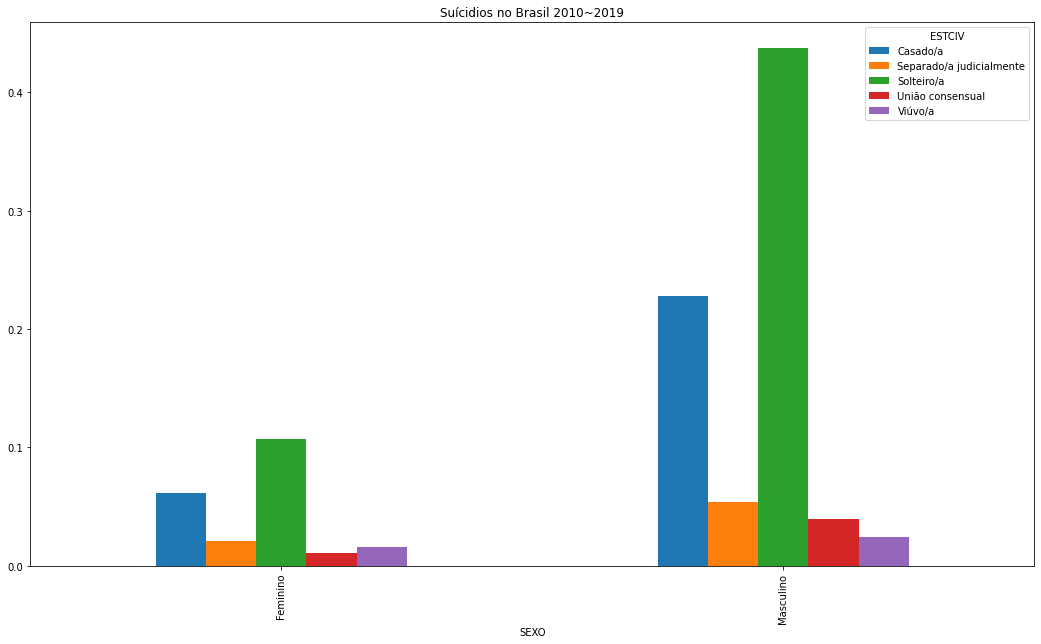

In [107]:
# Plotando gráfico de colunas lado a lado
tab.plot.bar(figsize=(18,10), title='Suícidios no Brasil 2010~2019')

<AxesSubplot:title={'center':'Suícidios no Brasil 2010~2019'}, xlabel='SEXO'>

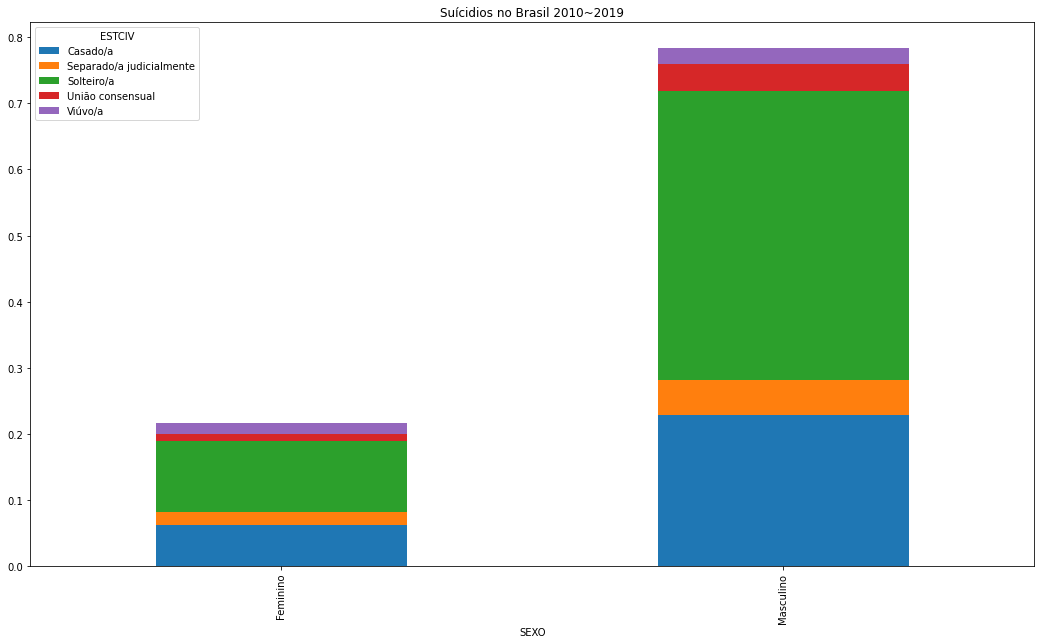

In [108]:
# Plotando gráfico de colunas empilhadas
tab.plot.bar(figsize=(18,10), stacked=True, title='Suícidios no Brasil 2010~2019')